In [260]:
import re # for regular expressions
import pandas as pd 
pd.set_option("display.max_colwidth", 200)
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string # for dealing with strings
import nltk # for text manipulation
import warnings 
import gensim
from textblob import TextBlob
from wordcloud import WordCloud
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

## Using a CSV with 10,000 tweets about COVID-19, scraped with GetOldTweets3

In [261]:
covid = pd.read_csv('data/COVID-10k-tweets.csv')

In [262]:
covid.head()

,Unnamed: 0,Datetime,Text
0,0,2020-07-02 23:59:59+00:00,Mahoning County Launches COVID-19 Dashboard #Covid-19 #coronavirus #Mahoning County
1,1,2020-07-02 23:59:59+00:00,Hospitals just became Covid runways. Let the people from home vote.
2,2,2020-07-02 23:59:59+00:00,Repubs like to bash NY for the number of cases & deaths. They conveniently ignore that NY got hit much earlier when COVID-19 &amp; how to respond were far less understood &amp; Trump was delaying ...
3,3,2020-07-02 23:59:59+00:00,"Trump “still has no plan for beating covid” “Why don’t we let this wash over the country? trump asked” This year when given a chance to remove this weak incompetent from office, 52/53 republican s..."
4,4,2020-07-02 23:59:58+00:00,THE JOLT: Sarah Riggs Amico and her COVID-19 testimonial


In [263]:
covid = covid.drop('Unnamed: 0',axis=1)

In [264]:
covid.shape

(10000, 2)

### Length of Tweets

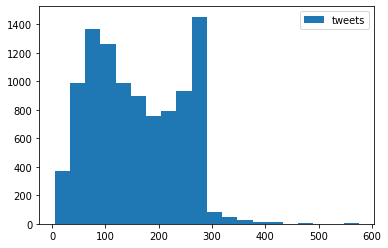

In [265]:
length = covid['Text'].str.len()

plt.hist(length, bins=20, label="tweets")
plt.legend()
plt.show()

## Data Cleaning

In [266]:
def remove_pattern(input_txt, pattern):   # create function called "remove pattern" - take the arguments of the text and a pattern to look for
    r = re.findall(pattern, input_txt)    # find all instances
    for i in r:
        input_txt = re.sub(i, '', input_txt)   #and each time you find it replace with "" (ie. with nothing = remove)
        
    return input_txt  

In [267]:
covid['fixed_Text'] = covid['Text'].str.replace("[^a-zA-Z]", " ") #str.replace from string library
#replace any charachter that does not start with (^) a small letter or big letter (removes numbers, emoji text etc. 
# also the # from hashtags)
covid.head()

,Datetime,Text,fixed_Text
0,2020-07-02 23:59:59+00:00,Mahoning County Launches COVID-19 Dashboard #Covid-19 #coronavirus #Mahoning County,Mahoning County Launches COVID Dashboard Covid coronavirus Mahoning County
1,2020-07-02 23:59:59+00:00,Hospitals just became Covid runways. Let the people from home vote.,Hospitals just became Covid runways Let the people from home vote
2,2020-07-02 23:59:59+00:00,Repubs like to bash NY for the number of cases & deaths. They conveniently ignore that NY got hit much earlier when COVID-19 &amp; how to respond were far less understood &amp; Trump was delaying ...,Repubs like to bash NY for the number of cases deaths They conveniently ignore that NY got hit much earlier when COVID amp how to respond were far less understood amp Trump was delaying ...
3,2020-07-02 23:59:59+00:00,"Trump “still has no plan for beating covid” “Why don’t we let this wash over the country? trump asked” This year when given a chance to remove this weak incompetent from office, 52/53 republican s...",Trump still has no plan for beating covid Why don t we let this wash over the country trump asked This year when given a chance to remove this weak incompetent from office republican s...
4,2020-07-02 23:59:58+00:00,THE JOLT: Sarah Riggs Amico and her COVID-19 testimonial,THE JOLT Sarah Riggs Amico and her COVID testimonial


## Sentiment Analysis

In [268]:
def subjectivity(text): #how opinionated the text is
    return TextBlob(text).sentiment.subjectivity
def polarity(text): #how positive or negative the text is
    return TextBlob(text).sentiment.polarity

In [269]:
#adding subjectivity and polarity columns to the dataaframe
covid['Subjectivity'] = covid['fixed_Text'].apply(subjectivity)
covid['polarity'] = covid['fixed_Text'].apply(polarity)

In [270]:
covid.head()

,Datetime,Text,fixed_Text,Subjectivity,polarity
0,2020-07-02 23:59:59+00:00,Mahoning County Launches COVID-19 Dashboard #Covid-19 #coronavirus #Mahoning County,Mahoning County Launches COVID Dashboard Covid coronavirus Mahoning County,0.000000,0.000000
1,2020-07-02 23:59:59+00:00,Hospitals just became Covid runways. Let the people from home vote.,Hospitals just became Covid runways Let the people from home vote,0.000000,0.000000
2,2020-07-02 23:59:59+00:00,Repubs like to bash NY for the number of cases & deaths. They conveniently ignore that NY got hit much earlier when COVID-19 &amp; how to respond were far less understood &amp; Trump was delaying ...,Repubs like to bash NY for the number of cases deaths They conveniently ignore that NY got hit much earlier when COVID amp how to respond were far less understood amp Trump was delaying ...,0.372917,0.108333
3,2020-07-02 23:59:59+00:00,"Trump “still has no plan for beating covid” “Why don’t we let this wash over the country? trump asked” This year when given a chance to remove this weak incompetent from office, 52/53 republican s...",Trump still has no plan for beating covid Why don t we let this wash over the country trump asked This year when given a chance to remove this weak incompetent from office republican s...,0.495833,-0.362500
4,2020-07-02 23:59:58+00:00,THE JOLT: Sarah Riggs Amico and her COVID-19 testimonial,THE JOLT Sarah Riggs Amico and her COVID testimonial,0.000000,0.000000


In [271]:
#function to show whether a sentiment is positive, negative, or neutral, based off of score
def analysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [272]:
#adding analysis column to dataframe
covid['Analysis'] = covid['polarity'].apply(analysis)

In [273]:
covid.head()

,Datetime,Text,fixed_Text,Subjectivity,polarity,Analysis
0,2020-07-02 23:59:59+00:00,Mahoning County Launches COVID-19 Dashboard #Covid-19 #coronavirus #Mahoning County,Mahoning County Launches COVID Dashboard Covid coronavirus Mahoning County,0.000000,0.000000,Neutral
1,2020-07-02 23:59:59+00:00,Hospitals just became Covid runways. Let the people from home vote.,Hospitals just became Covid runways Let the people from home vote,0.000000,0.000000,Neutral
2,2020-07-02 23:59:59+00:00,Repubs like to bash NY for the number of cases & deaths. They conveniently ignore that NY got hit much earlier when COVID-19 &amp; how to respond were far less understood &amp; Trump was delaying ...,Repubs like to bash NY for the number of cases deaths They conveniently ignore that NY got hit much earlier when COVID amp how to respond were far less understood amp Trump was delaying ...,0.372917,0.108333,Positive
3,2020-07-02 23:59:59+00:00,"Trump “still has no plan for beating covid” “Why don’t we let this wash over the country? trump asked” This year when given a chance to remove this weak incompetent from office, 52/53 republican s...",Trump still has no plan for beating covid Why don t we let this wash over the country trump asked This year when given a chance to remove this weak incompetent from office republican s...,0.495833,-0.362500,Negative
4,2020-07-02 23:59:58+00:00,THE JOLT: Sarah Riggs Amico and her COVID-19 testimonial,THE JOLT Sarah Riggs Amico and her COVID testimonial,0.000000,0.000000,Neutral


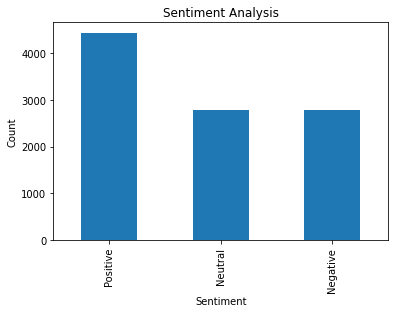

In [274]:
#distribution of sentiments
covid['Analysis'].value_counts().plot(kind='bar')
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

## Removing Words that have to do with COVID

We want to look at the words ABOUT COVID, so COVID related words are not needed

In [275]:
#adding a new column to the dataframe to store the cleaned up tweets
covid['fixed_Text'] = np.vectorize(remove_pattern)(covid['fixed_Text'], "COVID")

In [276]:
covid['fixed_Text'] = np.vectorize(remove_pattern)(covid['fixed_Text'], "Covid")

In [277]:
covid['fixed_Text'] = np.vectorize(remove_pattern)(covid['fixed_Text'], "covid")

In [278]:
covid['fixed_Text'] = np.vectorize(remove_pattern)(covid['fixed_Text'], "Coronavirus")

In [279]:
covid['fixed_Text'] = np.vectorize(remove_pattern)(covid['fixed_Text'], "coronavirus")

## Removing stopwords

In [280]:
from nltk.corpus import stopwords
stop = nltk.download('stopwords')
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kwong\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [281]:
covid['fixed_Text'] = covid['fixed_Text'].apply(lambda x: ' '.join(x for x in x.split() if x not in stop)) 

In [282]:
covid.head()

,Datetime,Text,fixed_Text,Subjectivity,polarity,Analysis
0,2020-07-02 23:59:59+00:00,Mahoning County Launches COVID-19 Dashboard #Covid-19 #coronavirus #Mahoning County,Mahoning County Launches Dashboard Mahoning County,0.000000,0.000000,Neutral
1,2020-07-02 23:59:59+00:00,Hospitals just became Covid runways. Let the people from home vote.,Hospitals became runways Let people home vote,0.000000,0.000000,Neutral
2,2020-07-02 23:59:59+00:00,Repubs like to bash NY for the number of cases & deaths. They conveniently ignore that NY got hit much earlier when COVID-19 &amp; how to respond were far less understood &amp; Trump was delaying ...,Repubs like bash NY number cases deaths They conveniently ignore NY got hit much earlier amp respond far less understood amp Trump delaying meaningful notification amp action More recent outbreaks...,0.372917,0.108333,Positive
3,2020-07-02 23:59:59+00:00,"Trump “still has no plan for beating covid” “Why don’t we let this wash over the country? trump asked” This year when given a chance to remove this weak incompetent from office, 52/53 republican s...",Trump still plan beating Why let wash country trump asked This year given chance remove weak incompetent office republican senators amp gop reps voted keep power Don ever forget,0.495833,-0.362500,Negative
4,2020-07-02 23:59:58+00:00,THE JOLT: Sarah Riggs Amico and her COVID-19 testimonial,THE JOLT Sarah Riggs Amico testimonial,0.000000,0.000000,Neutral


## Removing short words

In [283]:
covid['fixed_Text'] = covid['fixed_Text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

## Most Frequent and Infrequent words used

In [284]:
#Most frequent used words
freq = pd.Series(' '.join(covid['fixed_Text']).split()).value_counts()[:10]
freq

people      1249
cases       1053
https        867
like         633
Trump        629
mask         548
going        482
deaths       438
positive     418
back         399
dtype: int64

In [285]:
#most infrequent used words
freq = pd.Series(' '.join(covid['fixed_Text']).split()).value_counts()[-10:]
freq

whiney             1
resurge            1
LegalOmbudsman     1
evaluated          1
TheNewYorkTimes    1
Ekiti              1
dOwN               1
handed             1
Hiking             1
Workplace          1
dtype: int64

## Tokenizing

In [286]:
tokenized_tweet = covid['fixed_Text'].apply(lambda x: x.split()) # tokenizing 

In [287]:
tokenized_tweet.head()

0                                                                                                                                                  [Mahoning, County, Launches, Dashboard, Mahoning, County]
1                                                                                                                                                           [Hospitals, became, runways, people, home, vote]
2    [Repubs, like, bash, number, cases, deaths, They, conveniently, ignore, much, earlier, respond, less, understood, Trump, delaying, meaningful, notification, action, More, recent, outbreaks, less, ...
3                     [Trump, still, plan, beating, wash, country, trump, asked, This, year, given, chance, remove, weak, incompetent, office, republican, senators, reps, voted, keep, power, ever, forget]
4                                                                                                                                                                   [JOLT, Sarah, Ri

Normalizing the tokenized tweets

In [288]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x])

In [289]:
tokenized_tweet[:5]

0                                                                                                                                      [mahon, counti, launch, dashboard, mahon, counti]
1                                                                                                                                             [hospit, becam, runway, peopl, home, vote]
2    [repub, like, bash, number, case, death, they, conveni, ignor, much, earlier, respond, less, understood, trump, delay, meaning, notif, action, more, recent, outbreak, less, excus]
3                  [trump, still, plan, beat, wash, countri, trump, ask, thi, year, given, chanc, remov, weak, incompet, offic, republican, senat, rep, vote, keep, power, ever, forget]
4                                                                                                                                                  [jolt, sarah, rigg, amico, testimoni]
Name: fixed_Text, dtype: object

In [290]:
#adding normalized tweets back into the dataframe as fixed_Text
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
    
covid['fixed_Text'] = tokenized_tweet

In [291]:
covid.head()

,Datetime,Text,fixed_Text,Subjectivity,polarity,Analysis
0,2020-07-02 23:59:59+00:00,Mahoning County Launches COVID-19 Dashboard #Covid-19 #coronavirus #Mahoning County,mahon counti launch dashboard mahon counti,0.000000,0.000000,Neutral
1,2020-07-02 23:59:59+00:00,Hospitals just became Covid runways. Let the people from home vote.,hospit becam runway peopl home vote,0.000000,0.000000,Neutral
2,2020-07-02 23:59:59+00:00,Repubs like to bash NY for the number of cases & deaths. They conveniently ignore that NY got hit much earlier when COVID-19 &amp; how to respond were far less understood &amp; Trump was delaying ...,repub like bash number case death they conveni ignor much earlier respond less understood trump delay meaning notif action more recent outbreak less excus,0.372917,0.108333,Positive
3,2020-07-02 23:59:59+00:00,"Trump “still has no plan for beating covid” “Why don’t we let this wash over the country? trump asked” This year when given a chance to remove this weak incompetent from office, 52/53 republican s...",trump still plan beat wash countri trump ask thi year given chanc remov weak incompet offic republican senat rep vote keep power ever forget,0.495833,-0.362500,Negative
4,2020-07-02 23:59:58+00:00,THE JOLT: Sarah Riggs Amico and her COVID-19 testimonial,jolt sarah rigg amico testimoni,0.000000,0.000000,Neutral


## Visualization / Word Cloud

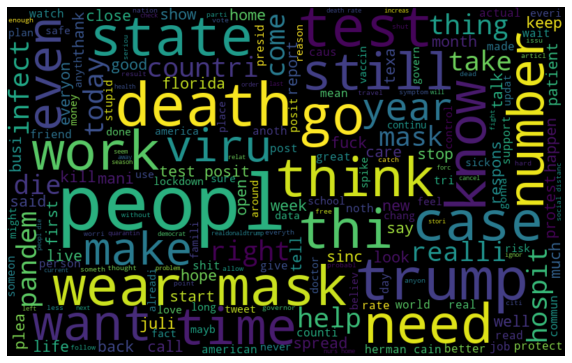

In [292]:
all_words = ' '.join([text for text in covid['fixed_Text']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

## Hashtags

In [293]:
# function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [294]:
HT = hashtag_extract(covid['Text'])
HT = sum(HT,[])

In [295]:
#list of all hashtags
HT

['Covid',
 'coronavirus',
 'Mahoning',
 'covid19countrywises',
 'TrumpLiesAmericansDie',
 'Coronavirus',
 'COVID19',
 'Protests',
 'covid19',
 'coronavirus',
 'VanillaIce',
 '4thofJuly',
 'ParksAndRec',
 '1',
 'Pray',
 'Repent',
 'TheWayTheTruthTheLife',
 'USA',
 'independenceday2020',
 'PatriotsFight',
 'CCPVirus',
 'Covid',
 'CovidCrimes',
 'Heatlh',
 'Ziegler',
 'KamalaHarrisForVP',
 'ForTheKids',
 'boycott',
 'ANTIFAterrorista',
 'MOB',
 'LiberallyCorruptOpposition',
 'ThursdayMotivation',
 'news',
 'COVID__19',
 'COVID19',
 'MandatoryMasks',
 'Covid19',
 'TrumpLiesPeopleDie',
 'VoteForOurLives',
 'JMIR',
 'Preprint',
 'digitalhealth',
 'COVIDー19',
 'nursinghomes',
 'MaskUp',
 'WearAMask',
 'WearADamnMask',
 'COVID19',
 'COVID__19',
 'hypocrite',
 'bully',
 'racist',
 'Resign',
 'I',
 'CHRIS',
 'Hansard',
 'COVID',
 'US',
 'disability',
 'humanrights',
 'accessibility',
 'Gunmen',
 'Kogi',
 'covid',
 'BoomerBabesLifeMagazine',
 'womenover50',
 'womensmagazine',
 'magazine',
 'artic

C:\Users\kwong\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 12540 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\kwong\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 12540 missing from current font.
  font.set_text(s, 0, flags=flags)


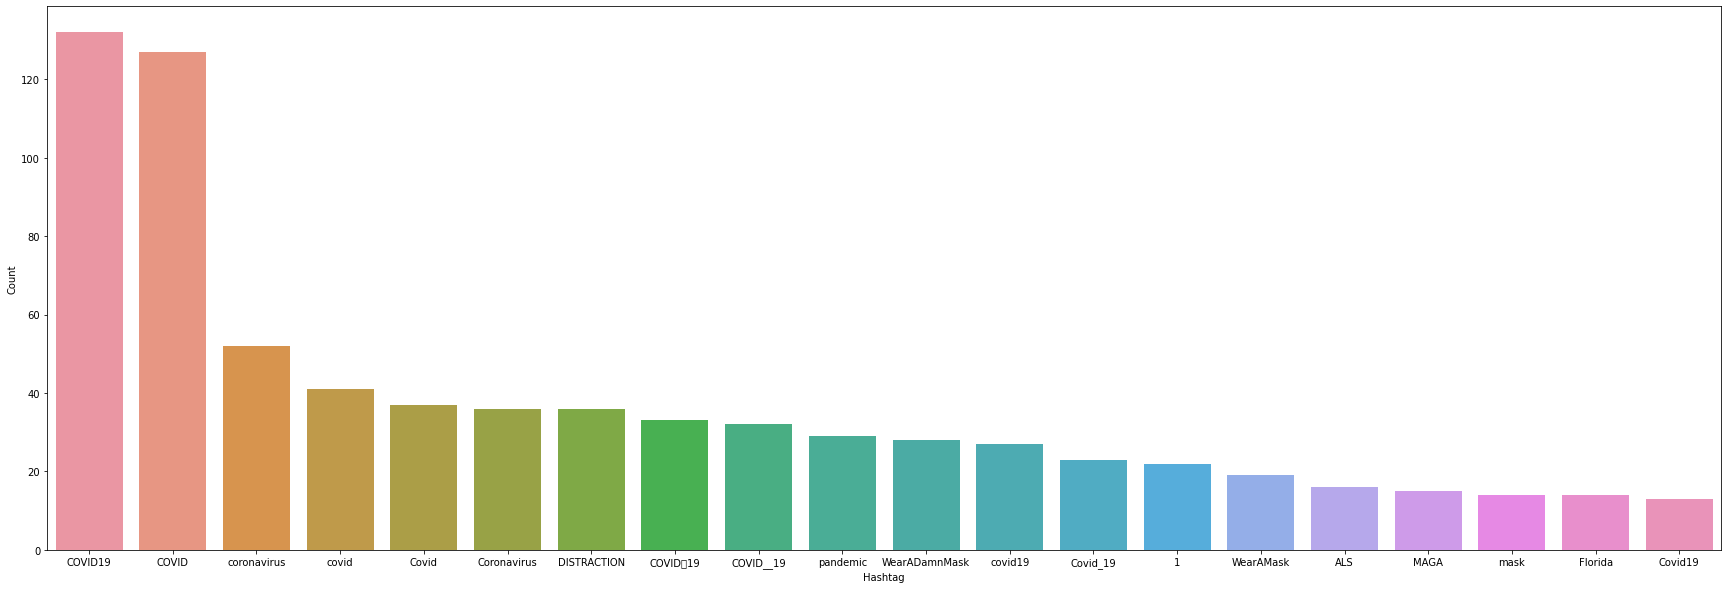

In [296]:
#plot count of hashtags
a = nltk.FreqDist(HT)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(30,10))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

## Word2Vec

Capturing context of words

In [297]:
tokenized_tweet = covid['fixed_Text'].apply(lambda x: x.split()) # tokenizing

model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            size=200, # desired no. of features/independent variables 
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34)

model_w2v.train(tokenized_tweet, total_examples= len(covid['fixed_Text']), epochs=10)

(1135277, 1273380)

In [298]:
#words most similar to "trump"
model_w2v.wv.most_similar(positive="trump")

[('astound', 0.6273329257965088),
 ('lousi', 0.6270971298217773),
 ('trumpknewanddidnoth', 0.6167776584625244),
 ('debacl', 0.6074776649475098),
 ('humili', 0.6053494215011597),
 ('roycoopernc', 0.6031591892242432),
 ('gloat', 0.6020712852478027),
 ('reelect', 0.5997601747512817),
 ('puppet', 0.5934638977050781),
 ('perpetr', 0.5924140214920044)]

In [299]:
#words most similar to "mask"
model_w2v.wv.most_similar(positive="mask")

[('wear', 0.768577516078949),
 ('maskup', 0.6490097641944885),
 ('govabbott', 0.6379581689834595),
 ('subway', 0.6378473043441772),
 ('makeup', 0.6324143409729004),
 ('wearer', 0.6322087049484253),
 ('religi', 0.6308997273445129),
 ('texan', 0.6275123953819275),
 ('facial', 0.6271100044250488),
 ('aniston', 0.6228257417678833)]